In [1]:
from IPython.display import Latex
from IPython.display import Image

# 神经网络基础 

人工神经网络，是20世纪80 年代以来人工智能领域兴起的研究热点。它从信息处理角度对人脑神经元网络进行抽象， 建立某种简单模型，按不同的连接方式组成不同的网络。在工程与学术界也常直接简称为神经网络或类神经网络。神经网络是一种运算模型，由大量的节点（或称神经元）之间相互联接构成。每个节点代表一种特定的输出函数，称为激励函数。每两个节点间的连接都代表一个对于通过该连接信号的加权值，称之为权重，这相当于人工神经网络的记忆。网络的输出则依网络的连接方式，权重值和激励函数的不同而不同。而网络自身通常都是对自然界某种算法或者函数的逼近，也可能是对一种逻辑策略的表达。

![NN.jpg](https://i.loli.net/2019/10/21/DxQryAwusmMcR5P.jpg)

以上是百度百科对神经网络的定义，看起来可能很玄乎，但是说白了神经网络其实就是一个多元函数，它给出了从输入特征到预测结果的一个映射，而映射的法则则是从海量的数据当中学习出来的，其中蕴藏着一定的统计与优化的知识。在百度百科的定义中，有几个概念是值得深究的，一是神经元(也就是结点)，它代表着一种特定的输出函数——激励函数，激励函数对应着数据的非线性变换；二是结点间的连接，它是信息从一层神经元传到另一层神经元的传播，这种传播对应着数据的线性变换，这些概念在下面将会提到

## 正向传播

神经网络的正向传播过程即是给定输入计算输出的过程，我们来看一个浅层神经网络的例子，来简单地了解一下这种传播是如何进行的
![nn1.png](https://i.loli.net/2019/10/23/rD9Mkn3i1uCaZjo.png)

对于一个简单的神经网络，其第一层称为输入层，即输入的特征x，它也可以被看成一个n维的向量(n是特征的数量)，比如我们要识别一张图片是猫还是狗，那么输入的就有可能是一个784维的向量，每一个元素代表了一个像素(在这里我们假定图片的像素为$28\times28$)，中间用于传递计算的神经元被称为隐藏层，这得名于在训练过程中它们的更新信息很大程度上是个黑匣子，最后一层对应着输出层，还是以猫狗识别为例，那么输出层的两个神经元就分别代表着图片是猫还是狗的概率，哪一个大，我们就预测整张图片为哪一个，现在我们做一些符号约定
规定$x_i$代表第二个特征，$\omega_j^{[i]}$代表第i层的第j个权重，$b_j^{[i]}$代表第i层第j个神经元所对应的偏移，对于偏移，你可以把它理解为截距或是一个标量，$z_j^{[i]}$代表第i个隐层层第j个神经元前端输入的计算结果$a_j^{[i]}$代表第i个隐层层第j个神经元后端输出的计算结果，$y_i$代表最后的第i个神经元的输出，$\sigma(z)$代表对$z$所作的激活函数，为了让大家有一个稍微具象一些的感受，这里给出一个常用激活函数的形式，这个函数被称为sigmoid函数$$\sigma(z)=\frac{1}{1+e^{-z}}$$，下面我们先看一个局部传播的简单例子![propagation.png](https://i.loli.net/2019/10/23/LaOjvDg8lJ5MdH7.png)这是三个输入神经元向一个隐藏层神经元传播的例子，下方给出了计算的相应公式，即$$z_{1}^{[1]}=w_{1}^{[1] T} x+b_{1}^{[1]}$$$$a_{1}^{[1]}=\sigma\left(z_{1}^{[1]}\right)$$(如果不理解可以简单说明一下...)，那么对于一个更复杂的情形，将三个输入神经元传播到隐藏层的四个神经元，结果只是对上式的复制![propagation2.png](https://i.loli.net/2019/10/23/3Qg6jOT2LPzv4DH.png)

$$
\begin{array}{l}{z_{1}^{[1]}=w_{1}^{[1] T} x+b_{1}^{[1]}, a_{1}^{[1]}=\sigma\left(z_{1}^{[1]}\right)} \\ {z_{2}^{[1]}=w_{2}^{[1] T} x+b_{2}^{[1]}, a_{2}^{[1]}=\sigma\left(z_{2}^{[1]}\right)} \\ {z_{3}^{[1]}=w_{3}^{[1] T} x+b_{3}^{[1]}, a_{3}^{[1]}=\sigma\left(z_{3}^{[1]}\right)} \\ {z_{4}^{[1]}=w_{4}^{[1] T} x+b_{4}^{[1]}, a_{4}^{[1]}=\sigma\left(z_{4}^{[1]}\right)}\end{array}
$$

如果你执行神经网络的程序，用for循环来做这些看起来真的很低效,所以接下来我们要做的就是把这四个等式向量化,向量化的过程是将神经网络中的一层神经元参数纵向堆积起来，例如隐藏层中的$\omega$纵向堆积起来变成一个的矩阵，用符号$W^{[1]}$表示,另一个看待这个的方法是我们有四个逻辑回归单元，且每一个逻辑回归单元都有相对应的参数——向量$\omega$，把这四个向量堆积在一起，你会得出这4×3的矩阵。
那么就有，$$z^{[n]}=w^{[n]} x+b^{[n]}$$，$$a^{[n]}=\sigma\left(z^{[n]}\right)$$
更具体地，$$\left[\begin{array}{c}{z_{1}^{[1]}}  \\ {z_{2}^{[1]}} \\ {z_{3}^{[1]}} \\ {z_{4}^{[1]}}\end{array}\right]=\left[\begin{array}{c}{\ldots W_{1}^{[1] T} \ldots} \\ {\ldots W_{2}^{[1] T} \ldots} \\ {\cdots W_{3}^{[1] T} \ldots} \\ {\ldots W_{4}^{[1] T} \ldots}\end{array}\right] *\left[\begin{array}{c}{x_{1}} \\ {{x}_{2}} \\ {x_{3}}\end{array}\right]+\left[\begin{array}{l}{b_{1}^{[1]}} \\ {b_{2}^{[1]}} \\ {b_{3}^{[1]}} \\ {b_{4}^{[1]}}\end{array}\right]$$
值得注意的是，神经网络的训练通常需要有很多样本，而我们上面只是简单地给出了样本容量为1时的情形，那么我们只需要在另一个维度上对x进行叠加即可，这时候的x就变成了一个二维矩阵，如以下是有$m$个样本的情形，$$x=\left[\begin{array}{cccc}{\vdots} & {\vdots} & {\vdots} & {\vdots} \\ {x^{(1)}} & {x^{(2)}} & {\dots} & {x^{(m)}} \\ {\vdots} & {\vdots} & {\vdots} & {\vdots}\end{array}\right]$$
那么这时$a$与$z$也不再只是简单的列向量，而是包含了m个样本信息的二维矩阵了，有
$$Z^{[1]}=\left[\begin{array}{cccc}{\vdots} & {\vdots} & {\vdots} & {\vdots} \\ {z^{[1](1)}} & {z^{[1](2)}} & {\dots} & {z^{[1](m)}} \\ {\vdots} & {\vdots} & {\vdots} & {\vdots}\end{array}\right]$$
$$A^{[1]}=\left[\begin{array}{cccc}{\vdots} & {\vdots} & {\vdots} & {\vdots} \\ {a^{[1]}(1)} & {a^{[1](2)}} & {\cdots} & {a^{[1](m)}} \\ {\vdots} & {\vdots} & {\vdots} & {\vdots}\end{array}\right]$$

### 激活函数 

为什么我们需要在每个神经元节点使用激活函数激活呢？这点是十分显然的，因为如果我们只使用$z=w^{T} x+b$的形式来传递输入数据，那么神经网络将只能表征线性变换，即我们人为地限定了输入特征与目标输出之间一定是线性的关系，那么这样不管多深的神经网络在本质上都只相当于有一层，举一个很简单的例子对于$y_1=a_1*x+b_1$，如果我们再向后传播一次$y_2=a_2*y_1+b_2$，那么展开这个式子$y_2=a_1*a_2*x+a_2*b_1+b_2$这个式子本质上来看还是$y=a*x+b$的形式，也就是说$a_1*a_2$与a是无异的，因为我们都可以通过数据学到它们。可想而知，加入激活函数，模型将具有表征非线性的能力，因为这时候层与层之间的传播不再只是简单的线性传递，而多了一些曲线形式的变换。  
使用一个神经网络时，需要决定使用哪种激活函数用隐藏层上，哪种用在输出节点上。在之前的例子中我们只使用了sigmoid函数，但是，有时其他的激活函数效果会更好。几乎在所有情况下，tanh函数($\tanh (z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$)是总体上都优于sigmoid函数的激活函数(事实上，tanh函数是将sigmoid函数在纵轴上做了拉伸与平移),因为函数值域在-1和+1的激活函数，其均值是更接近零均值的。在训练一个算法模型时，如果使用tanh函数代替sigmoid函数中心化数据，使得数据的平均值更接近0而不是0.5，这将更有利于之后的学习。  

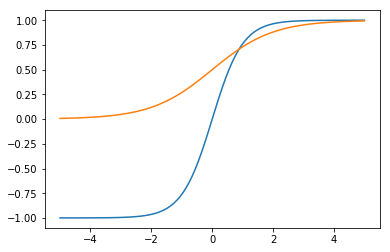

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-5,5,100)
tanh_y = tanh(x)
sigmoid_y = sigmoid(x)
plt.plot(x,tanh_y)
plt.plot(x,sigmoid_y)

然而现在学术界最常使用的函数是ReLu(线性修正单元)函数，包括在下面的GoogleNet中也是使用的ReLu函数，这是基于tanh和sigmoid函数都具有的两个缺点：1.幂运算开销过大 2.当x值远离0时，函数的梯度快速趋向于零。第一个理由很容易理解，而第二个理由则与下面要提到的反向传播有关$$ReLu(x)=\max (0, x)$$

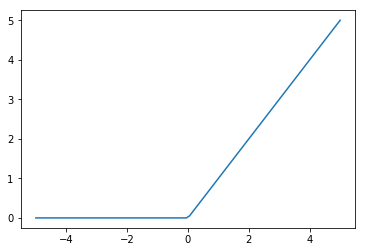

In [3]:
def ReLu(x):
    return 0 if x <= 0 else x
x = np.linspace(-5,5,100)
ReLu_y = x.copy()
ReLu_y[ReLu_y < 0] = 0
plt.plot(x,ReLu_y)

### 反向传播

神经网络最难理解的一部分莫过于反向传播，所以在这里我们不详细介绍它，而是给出一个直观的印象。我们都知道神经网络的目的是要从训练集中学习参数，那么怎样的参数学习是成功的呢？我们将每次神经网络预测的结果与真实值做一个差值，这个差值被称为损失项，我们的目的就是要最小化这个损失项。当提到最小化一个函数时，第一直觉肯定是求导找极值点，但是对于神经网络来说这并不奏效，因为神经网络的参数实在太庞大了，并且损失函数可能并不是凸函数，这时候我们便需要一个数值上的极小化方式——梯度下降，根据高数知识，我们知道梯度是方向导数的最大值，梯度的方向即是函数增长最快的方向(反方向即是下降最快的方向)，所以如果我们如果每次沿梯度方向走一小段距离，那么我们就可以保证函数值一定是下降的，基于这个思想，我们可以每次让所有的参数都在梯度方向上减小一点，一直迭代下去，直到收敛即可。而反向传播则是计算梯度的一种方法，它通过链式求导法则实现。

# 卷积神经网络 

   卷积神经网络是含有卷积层的神经网络,并被逐渐应用在诸如自然语言处理、推荐系统和语音识别等领域。卷积神经网络是近年来深度学习能在计算机视觉领域取得突破性成果的基石，其中有两个尤为重要的“层”的概念——卷积层(Convolution)与池化层(Pooling)。

![CNN.png](https://i.loli.net/2019/10/21/uavkPhSzNOVpLTY.png)

## 卷积层

### 互相关运算(卷积运算)

在二维卷积层中，一个二维输入数组和一个二维核数组（卷积核）通过互相关运算，并在此基础上加上一个标量偏差，最终得到一个二维输出数组。在训练模型的时候，通常我们先对卷积核随机初始化，然后不断迭代卷积核与偏差。

![convolution.png](https://i.loli.net/2019/10/21/eAD4lZo2wmWpyOf.png)

如上图所示，输入是一个高和宽均为3的二维数组，而核数组的高和宽分别为2(该数组在卷积计算中又称卷积核或过滤器)，图中的阴影部分为第一个输出元素19及其计算所使用的输入和核数组元素对应位置的乘积：0×0+1×1+3×2+4×3=19(也即二者哈达玛积之和)，以此类推，将卷积核按照从左到右、从上到下的顺序“映射”在输入数组上并与其做互相关运算，即可得到最终的输出数组：

$$output_{11}=0\times0+1\times1+3\times2+4\times3=19$$
$$output_{12}=1\times0+2\times1+4\times2+5\times3=25$$
$$output_{21}=3\times0+4\times1+6\times2+7\times3=37$$
$$output_{22}=4\times0+5\times1+7\times2+8\times3=43$$

不难假设输入形状是(m,n)，卷积核形状是(h,w)，则最终输出数组的形状是$(m-h+1)\times(n-w+1)$，下面是卷积层的一个简单实现与测试

In [4]:
import numpy as np
#定义输入数组X与卷积核K的卷积运算
def corr(X, K):
    h, w = K.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [5]:
#测试卷积层
X = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = np.array([[0, 1], [2, 3]])
corr(X, K)

array([[19., 25.],
       [37., 43.]])

### 为什么要卷积？

卷积运算到底有什么用呢？下面我们来看一个关于边缘检测的demo

![edge.png](https://i.loli.net/2019/10/21/IvGF4UiEdp8bcVa.png)

In [6]:
X = np.ones((6, 8))
X[:, 2:6] = 0
K = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
X,K

(array([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]]), array([[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]]))

In [7]:
Y = corr(X, K)
Y

array([[ 3.,  3.,  0.,  0., -3., -3.],
       [ 3.,  3.,  0.,  0., -3., -3.],
       [ 3.,  3.,  0.,  0., -3., -3.],
       [ 3.,  3.,  0.,  0., -3., -3.]])

在这里，我们假设X是一张像素为8x8的二值灰度图像(1代表黑色，0代表白色)，其图像的左右两侧是黑色、中间是白色，那我们可以直观想象一下图像应该会有一个较为明显的黑色边框，我们观察X与K做卷积运算后得到的数组，发现在这个数组的两侧也出现了非零的部分，这就说明原来图像的信息在经过卷积处理后得到了提取，不失一般性得，如果图中的边框是横向的，我们也同样可以采用相应的卷积核提取其横向的边框，而事实上，随着计算机视觉近期的蓬勃发展，边缘检测也得到了飞速的发展，目前已经有许多成熟的算法用来解决不同的边缘检测问题，当然在这里我们可以得出一个关于卷积层的结论，卷积层可以用于提取空间中的模式特征。

### 卷积的其他重要概念 

#### 多输入通道与多输出通道情形下的卷积 

前面两节里我们用到的输入和输出都是二维数组，但真实数据的维度经常更高。例如，彩色图像在高和宽2个维度外还有RGB（红、绿、蓝）3个颜色通道。假设彩色图像的高和宽分别是$h$和$w$（像素），那么它可以表示为一个$3\times h\times w$的多维数组。我们将大小为3的这一维称为通道维。  
对于多输入通道的情形，有一个规定是卷积核的输入通道数必须与数据的输入通道数是相同的，来看一个例子，![multi1.png](https://i.loli.net/2019/10/25/QWridmYcaLZ1JPf.png)

这是一个二输入通道的数据，你可以把通道维想象成$z$轴，那么就相当于这个二维数组的"厚度"是2，那么我们以$z$为轴，将$z$轴上的每一个数组都与一个卷积核做卷积，这样就保证了卷积核的"厚度"(个数)与输入通道的"厚度"(个数)相同了。依次进行卷积运算后，将各个结果在$z$轴上累加起来即是最终结果。  
当输入通道有多个时，因为我们对各个通道的结果做了累加，所以不论输入通道数是多少，输出通道数总是为1。设卷积核输入通道数和输出通道数分别为$c_i$和$c_o$，高和宽分别为$k_h$和$k_w$。如果希望得到含多个通道的输出，我们可以为每个输出通道分别创建形状为$c_i\times k_h\times k_w$的核数组。将它们在输出通道维上连结，卷积核的形状即$c_o\times c_i\times k_h\times k_w$。在做互相关运算时，每个输出通道上的结果由卷积核在该输出通道上的核数组与整个输入数组计算而来。

####  填充

在上面的示例中我们可以看到，如果我们使用一个2x2的卷积核去卷积一个3x3的输入数组，那么最终将会得到一个2x2的输出数组，并且我们推导得出了输出数组的维度为$(m-h+1)\times(n-w+1)$，不难发现如果我们使用的卷积核的大小大于1，那么输出数组的大小将会一直减小，想象一下我们现在有一张3x64x64的图像，每经过一次卷积它的大小便减小一点，那么可以想象，当网络深度很深的时候，图像将变得很小，其中很多的有效信息将被遗失。还有一个问题是，当我们使用卷积核对输入数组进行卷积的时候，处于边缘的像素点将只被计算一次，但如果是在中间的像素点，就会有许多区域与之重叠也就被计算多次，那么图像边缘的信息在输出中被采用的很少，换句话说，图像边缘的信息被丢失了。

为了解决上面提到的这两个问题，我们可以对图像采取填充(padding)的方式来规避问题，如下，我们对一个6x6的输入数组的上下左右各填充上行列，得到一个8x8的数组(通常填充的元素是0，当然也有别的选择)，这时再对它进行卷积，就可以得到一个6x6的输出数组了，对于我们开始时得到的公式：输出数组大小$(m-h+1)\times(n-w+1)$，如果我们现在考虑填充大小为p，那么它将变为:输出数组大小$(m-h+2p+1)\times(n-w+2p+1)$。例如对于一个5x5的卷积核，我们只需要对其填充两行两列就可以使输入输出的大小保持一致，而3x3、7x7的卷积核可以以此类推。

![padding.png](https://i.loli.net/2019/10/21/RxflZgrLKbkOSHD.png)

在GoogleNet及其他有名的网络结构中，通常使用的卷积核都是奇数维度大小的如3x3、5x5等，在有了填充的概念后，我们就可以对这种现象做出解释。如果我们使用了偶数大小的卷积核，那么根据输出数组大小$(m-h+2p+1)\times(n-w+2p+1)$，如果我们想保证输出数组的大小保持不变，那么我们就不能在图像的两侧都添加相同数目的行列，在这种情形下，这种填充就成为了不对称的填充，它将影响我们对图像边缘信息的采集。  
使用奇数维度大小的卷积核在实际操作上还有一个好处是，奇数大小的卷积核存在一个中心的元素，这便于我们来描述卷积核当前所处的位置。

#### 步长 

![stride.png](https://i.loli.net/2019/10/21/HZtWDyRBKi4znJd.png)

步长的大小反映了卷积核每次在输入数组上移动的位置信息，如上图是横向步长为2、纵向步长为3时的情形，即卷积核每次完成卷积后沿横向移动两个单元，而需要换行时，则沿纵向移动三个单元，如果考虑再将步长因素(stride,简记为s)纳入考虑，那么输出数组大小的公式变为我们需要的最终情形——$$(\lfloor\frac{(m+2p-h)}{s}\rfloor+1)\times(\lfloor\frac{(n+2p-w)}{s}\rfloor+1)$$  
但是在设置步长时有一个需要注意的地方是，如果卷积核移动到输入数组的右侧时，右侧所剩的宽度不足卷积核的宽度，那么这次卷积运算就不会发生，这就是公式中下取整符号的来历，当然这就意味着我们可能会丢失右侧边缘的某些信息，因而我们在步长选择时，通常会使得公式中的除法能够得到整除。还有一个十分显然但是值得注意的问题是，步长的选择最好不要超过卷积核的大小，这样也会造成某些行列特征信息的丢失。

#### 一种“特殊”的卷积——1*1卷积

因为使用了最小的窗口，这种卷积失去了卷积层可以识别高和宽维度上相邻元素构成的模式的功能，并且这种卷积并不会改变图像的高与宽。输出中的每个元素来自输入中在高和宽上相同位置的元素在不同通道之间的按权重相加，其本质上是输入数组中元素的线性重组。因此，卷积层的作用（在特征组合上）几乎与全连接层等价。但是，通过设置1*1卷积的输出通道数，可以对数据的输出通道数进行调整，而又不丢失特定位置的数据元素的相关信息，经常可以通过调整网络层之间的通道数来控制模型复杂度。

![11convolution.png](https://i.loli.net/2019/10/21/ivwpKrfmdkzlSEs.png)

上图即是用一个输出通道数为2的1*1卷积核（卷积层大小为(3,2,1,1)），将输入通道数为3的数据调整为输出通道为2的数据，从而有效地控制了模型复杂度。

### 池化运算

同卷积层类似，池化层每次对输入数据的一个固定形状的窗口（池化窗口）中的元素计算输出。不同于卷积层里计算输入和核的互相关性，池化层直接计算池化窗口内元素的最大值或者平均值，也称最大池化或平均池化。

![pool.png](https://i.loli.net/2019/10/21/geOGKd3yhtlQ4o2.png)

上图即是对输入数组做2*2最大池化（对窗口中元素进行max运算）得到的输出数组，而如果是平均池化层，则是对窗口内的所有元素取均值。

### 为什么要池化？

从上面可以看出，池化就是把那一小片的信息综合一些，整合成一个信息。  
这样做有两个明显的优势，一是如果有数据在这一小片范围内变动，一般不太会影响池化的结果，换句话说，就是对降低了模型在这个位置上的敏感性；二是池化层对输入的特征图进行了压缩，简化了神经网络的计算，但却保留了其主要特征。

### 写在最后的总结

①模式特征出现在检测图像的较小区域。  
如我们要探测鸟喙，而鸟喙并不会出现在一整张图片中而是出现在某一个特定的区域。  
②相似的模式特征可以在图像的不同区域被探测到。  
如我们对于不同的图片，鸟喙可能出现在图片的不同区域，但都不会是整张图片，而卷积核在图像上左右平移则可以提取这些特征  
③在图像中抽取特定行列的像素值，并不会在宏观上对图像造成太大的改变与影响。  
如将一张待辨识的鸟的图像抽取其中部分像素后所形成的新图像看起来仍然是一只鸟，只不过稍显模糊(观其大略)。  
而卷积神经网络的主要设计也与这些适用范围有着天然的联系。  

![summary.png](https://i.loli.net/2019/10/21/6zqKJZitsGh9evE.png)

## GoogleNet的核心——Inception结构(v1)

![Inception.png](https://i.loli.net/2019/10/21/EKNMOdwcaWzF1t9.png)

### 特征与优势

i 采用不同大小的卷积核意味着不同大小的感受野，最后拼接意味着不同尺度特征的融合，同时这种不同尺度空间特征的抽取是并行运算的。  
ii 之所以卷积核大小采用(1,1)、(3,3)和(5,5)，主要是为了方便对齐，设定卷积步长等于1之后，只要分别设定填充分别等于0、1、2，采用卷积计算可以得到相同维度的特征，然后这些特征直接拼接在一起(在输出通道这一维度上拼接，输出通道数即感受野的厚度)。  
iii 由于(3,3)和(5,5)的卷积核仍然会带来巨大的计算成本,这是因为所需卷积核元素的个数与卷积核大小的平方成正比、也与输入通道数和输出通道数成正比$$num \propto kernelsize^2\times inputchannel \times outputchannel$$所以在(3,3)与(5,5)的卷积核之前、最大池化层之后分别加入了(1,1)的卷积核，起到了降低通道数个数的作用，显著地降低了需要学习的参数。  
iv 网络越到后面特征越抽象，且每个特征涉及的感受野也更大，随着层数的增加，3x3和5x5卷积的比例也要相应增加，甚至采用更大的卷积层（这是后话，如果没记错的话改进的GoogleNet结构就新加了许多7x7的卷积层）

### 一点额外的头脑风暴---What does CNN learn?

对于上面的第四点是我在读别人研究论文时一个很神奇的结论，也是我在学习卷积神经网络时颇惊艳我的一个想法，因为它在某种程度上打破了神经网络的黑匣子。现在考虑一个情景，我们已经训练好了一个神经网络，知道了它的某个卷积层的参数，现在我们想要知道这个卷积层从图像当中学到了什么，首先我们定义一个指标叫做ActiveDegree，并有$$ActiveDegree=\sum_{i=1}^m \sum_{j=1}^n filter_{i,j}$$它代表了一个卷积核被激活的程度即卷积核内所有元素的和，注意之前我们是对一个确定的输入X(像素矩阵)，学习到最佳的filter内的参数，现在问题反过来了，我们已知filter的值，想要学到一个输入数组X，使得$$
X^{*}=\arg\max _{X} ActiveDegree$$这时我们就可以使用梯度上升算法(Gradient ascent)来更新X使其最大化,在研究中，他们给出了能maximize实验中八个卷积核的那些个X，结果如下，![texture.png](https://i.loli.net/2019/10/21/lLSMABQdGioNyUE.png) 
如上面第一行的第三张图，它说明这个卷积核在学习一种能够探测斜条纹的"本领"，而第二行的第一个则说明卷积核在学习一种能够探测水平条纹的"本领"，这些特征都是十分局部的特征，他们紧接着又如法炮制地研究了一个相对靠后的全连接层，得到的结果如下![digit.png](https://i.loli.net/2019/10/21/k3oN2ZUrpfYd9Rm.png)如上面的第二行第一张图，它说明这个卷积核学到了一个本领，如果输入的图像中中间有一个小小的圆形的眼的结构，那么它就会被激活，不难发现，这时候检测到的特征更像是从全局上来把握，那么我们就有了一个更大胆的想法，如果我们将最后的输出层取出，用相同的方法去找到那个argmax的X时，那么我们得到的图像应该就趋近于数字，然而事与愿违，我们最终得到的结果是这样的，![digit2.png](https://i.loli.net/2019/10/23/pnkiM1dObJ2oG65.png)看起来很像是电视没有信号时雪花漫天飞舞的场景，但是，当真的把这几幅图片丢到CNN里时，结果却是第一张图片输出的分类结果正是0，第二张正是1...也就是说CNN理解图片并不是像我们人类一样理解图像，但是对于这些图片，直觉告诉我们这些肯定不是手写数字，因为手写数字图片里数字(白色)应该只出现在一个区域内，且占较少一部分，也就是说我们希望CNN学到的图片，白色尽可能少一些，黑色尽可能多一些，于是我们对所学到的输入X做一些修正$$x^{*}=\arg \max _{x}\left(ActiveDegree-\sum_{i, j}\left|x_{i j}\right|\right)$$上式的意思是我们希望让学到的ActiveDegree尽可能大一些，同时让$\sum_{i, j}\left|x_{i j}\right|$尽可能小一些($\left|x_{i j}\right|$代表的是x内的像素之和，我们对其做极小化处理，使白点尽可能少一些)，最后我们得到了如下的结果，从下面这张图里我们可以看出相应的数字已经初具轮廓了![digit3.png](https://i.loli.net/2019/10/23/eu8n5dlp9v7jDFa.png)如果大家对这个想法很感兴趣，油管上也有一个有趣的短视频《Deep neural networks are easily fooled》，附上视频网址https://www.youtube.com/watch?v=M2IebCN9Ht4 (如果需要翻墙也可以找我哇)

### 简单实现

In [8]:
import d2lzh as d2l
from mxnet import gluon, init, nd
from mxnet.gluon import nn

class Inception(nn.Block):
    # c1 - c4为每条线路里的层的输出通道数
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1 x 1卷积层
        self.p1_1 = nn.Conv2D(c1, kernel_size=1, activation='relu')
        # 线路2，1 x 1卷积层后接3 x 3卷积层
        self.p2_1 = nn.Conv2D(c2[0], kernel_size=1, activation='relu')
        self.p2_2 = nn.Conv2D(c2[1], kernel_size=3, padding=1,
                              activation='relu')
        # 线路3，1 x 1卷积层后接5 x 5卷积层
        self.p3_1 = nn.Conv2D(c3[0], kernel_size=1, activation='relu')
        self.p3_2 = nn.Conv2D(c3[1], kernel_size=5, padding=2,
                              activation='relu')
        # 线路4，3 x 3最大池化层后接1 x 1卷积层
        self.p4_1 = nn.MaxPool2D(pool_size=3, strides=1, padding=1)
        self.p4_2 = nn.Conv2D(c4, kernel_size=1, activation='relu')

    def forward(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        return nd.concat(p1, p2, p3, p4, dim=1)
        # 在通道维上连结输出

## GoogNet架构

![Googlenet.jpg](https://i.loli.net/2019/10/21/VgMOADPt7mJRCiL.jpg)

GoogLeNet在主体卷积部分中使用了5个模块，每个模块之间使用了大小为3x3，步长为2的最大池化层来降低输出高度。  
第一个模块使用了一个64通道的7x7卷积层，第二个模块首先使用了64通道的1x1卷积层，然后是将通道增大3倍的3x3卷积层，第三个模块使用了2个串联的Inception块，第四个模块使用了5个串联的Inception块，第五个模块使用了2个串联的模块（如上文所述，随着层数的增加，3x3和5x5卷积的比例也相应增加了）。在这些Inception块之间的不同深度增加了两个loss来避免梯度回传消失的过程。  
在第五个模块后紧跟输出层，其没有使用全连接层进行过渡而是使用了全局平均池化层，最后连接用于分类的神经元。

In [9]:
b1 = nn.Sequential()
b1.add(nn.Conv2D(64, kernel_size=7, strides=2, padding=3, activation='relu'),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))
b2 = nn.Sequential()
b2.add(nn.Conv2D(64, kernel_size=1, activation='relu'),
       nn.Conv2D(192, kernel_size=3, padding=1, activation='relu'),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))
b3 = nn.Sequential()
b3.add(Inception(64, (96, 128), (16, 32), 32),
       Inception(128, (128, 192), (32, 96), 64),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))
b4 = nn.Sequential()
b4.add(Inception(192, (96, 208), (16, 48), 64),
       Inception(160, (112, 224), (24, 64), 64),
       Inception(128, (128, 256), (24, 64), 64),
       Inception(112, (144, 288), (32, 64), 64),
       Inception(256, (160, 320), (32, 128), 128),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))
b5 = nn.Sequential()
b5.add(Inception(256, (160, 320), (32, 128), 128),
       Inception(384, (192, 384), (48, 128), 128),
       nn.GlobalAvgPool2D())

net = nn.Sequential()
net.add(b1, b2, b3, b4, b5, nn.Dense(10))
X = nd.random.uniform(shape=(1, 1, 96, 96))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential0 output shape:	 (1, 64, 24, 24)
sequential1 output shape:	 (1, 192, 12, 12)
sequential2 output shape:	 (1, 480, 6, 6)
sequential3 output shape:	 (1, 832, 3, 3)
sequential4 output shape:	 (1, 1024, 1, 1)
dense0 output shape:	 (1, 10)


## 参考资料与拓展 

1. 《动手学深度学习》  
2. bilibili 搜索"吴恩达深度学习"或"李宏毅深度学习"，有条件可以到coursera完成相应课程
3. CVPR、ICCV、NIPS等论文(谷歌搜索即可)